# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [78]:
data

{'coord': {'lon': -52.9, 'lat': 65.42},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 270.71,
  'feels_like': 258.67,
  'temp_min': 270.71,
  'temp_max': 270.71,
  'pressure': 998,
  'humidity': 66,
  'sea_level': 998,
  'grnd_level': 990},
 'wind': {'speed': 13.07, 'deg': 75},
 'clouds': {'all': 100},
 'dt': 1584593717,
 'sys': {'country': 'GL', 'sunrise': 1584610439, 'sunset': 1584654267},
 'timezone': -10800,
 'id': 3421982,
 'name': 'Maniitsoq',
 'cod': 200}

In [93]:
data['dt']

1584594358

In [79]:
weather_df = pd.DataFrame(columns=['city', 'Lng','Lat','Date','temperature',"max Temp",'humidity','wind speed','cloudiness'])
index=0
for city in cities:
    url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url)
    data = response.json()
    if data["cod"]!='404':
        weather_df.loc[index,'city'] = city
        weather_df.loc[index,'Lng'] = data['coord']["lon"]
        weather_df.loc[index,'Lat'] = data['coord']["lat"]
        weather_df.loc[index,'Date'] = data["dt"]
        weather_df.loc[index,'temperature'] = data['main']["temp"]
        weather_df.loc[index,'max Temp'] = data['main']["temp_max"]
        weather_df.loc[index,'humidity'] = data['main']["humidity"]
        weather_df.loc[index,'wind speed'] = data['wind']["speed"]
        weather_df.loc[index,'cloudiness'] = data['clouds']["all"]
        index+=1
    
#url="https://openweathermap.org/api/?q=London&apikey=08cb39e407d6ce65b268a340bb42d2f2"


In [73]:
weather_df.iloc[:10]

,city,latitude,temperature,humidity,wind speed,cloudiness
0,mount pleasant,32.79,290.05,100,2.72,20
1,khovu-aksy,51.13,271.51,64,2.22,0
2,albany,42.6,279.24,41,3.1,90
3,hobart,-42.88,290.58,68,3.6,90
4,port elizabeth,-33.92,288.15,100,3.1,28
5,codrington,-38.27,291.61,78,13.38,100
6,seidu,9.02,294.31,93,1.1,25
7,umm kaddadah,13.6,294.71,17,9.51,100
8,taurage,55.25,279.31,83,3.79,100
9,lebu,-37.62,282.21,96,2.11,0


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
weather_df.to_csv("city_weathers.csv", sep=',', index=False)

In [77]:
weather_df.count()

city           576
latitude       576
temperature    576
humidity       576
wind speed     576
cloudiness     576
dtype: int64

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [80]:
weather_df.head()

,city,Lng,Lat,temperature,max Temp,humidity,wind speed,cloudiness
0,mount pleasant,-79.86,32.79,290.01,291.48,100,2.72,20
1,khovu-aksy,93.6,51.13,271.51,271.51,64,2.22,0
2,albany,-73.97,42.6,278.96,282.15,42,5.1,90
3,hobart,147.33,-42.88,289.77,290.93,79,0.89,100
4,port elizabeth,25.57,-33.92,288.15,288.15,100,3.1,28


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

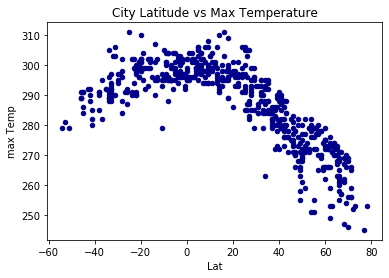

In [88]:
weather_df['Lat'] = weather_df['Lat'].astype(int)
weather_df['max Temp'] = weather_df['max Temp'].astype(int)
weather_df.plot.scatter('Lat', 'max Temp',c='DarkBlue',title="City Latitude vs Max Temperature")

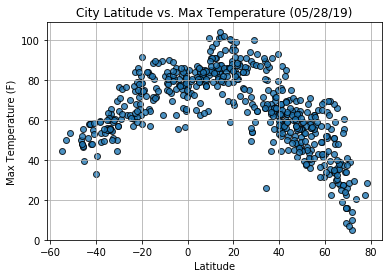

#### Latitude vs. Humidity Plot

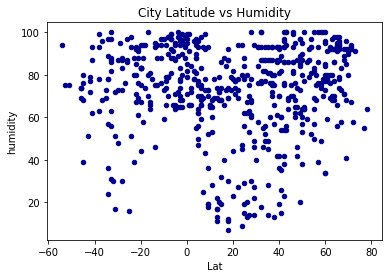

In [89]:
weather_df['humidity'] = weather_df['humidity'].astype(int)
weather_df.plot.scatter('Lat', 'humidity',c='DarkBlue', title="City Latitude vs Humidity")

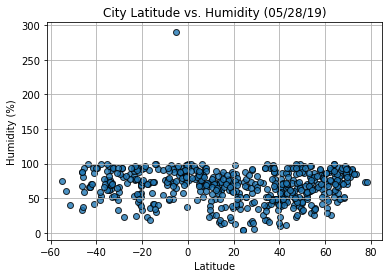

#### Latitude vs. Cloudiness Plot

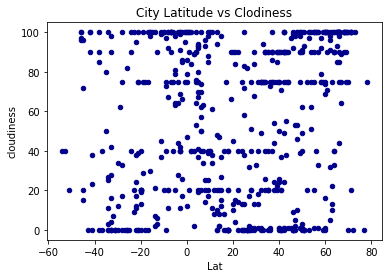

In [90]:
weather_df['cloudiness'] = weather_df['cloudiness'].astype(int)
weather_df.plot.scatter('Lat', 'cloudiness',c='DarkBlue', title="City Latitude vs Clodiness")

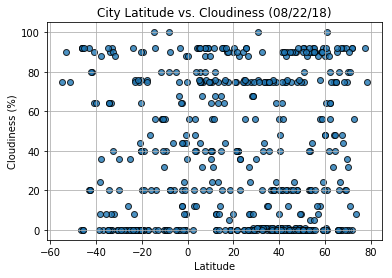

#### Latitude vs. Wind Speed Plot

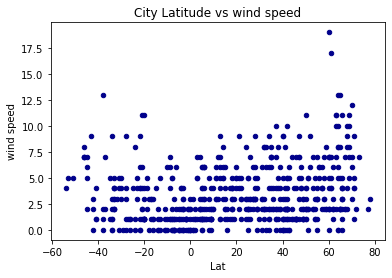

In [92]:
weather_df['wind speed'] = weather_df['wind speed'].astype(int)
weather_df.plot.scatter('Lat', 'wind speed',c='DarkBlue', title="City Latitude vs wind speed")

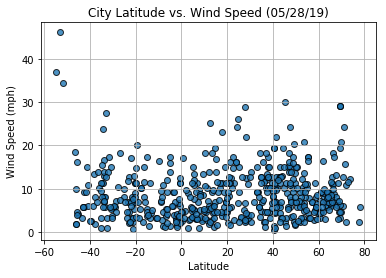

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [94]:
Northern_df = weather_df[weather_df['Lat']>=0]
Southern_df = weather_df[weather_df['Lat']<0]
Northern_df.plot.scatter('Lat', 'max Temp',c='DarkBlue',title="City Latitude vs Max Temperature")

The r-squared is:-0.89
Line equation is y = -0.61x + 305.53


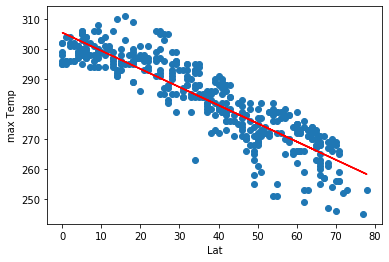

In [109]:
from scipy.stats import linregress
x_values = Northern_df['Lat']
y_values = Northern_df['max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('max Temp')
plt.show()

The r-squared is: -0.8151657406810827


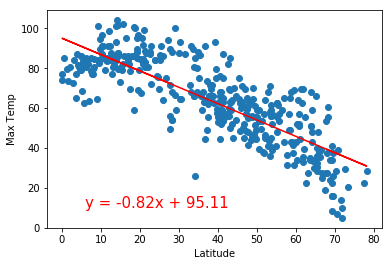

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.56
Line equation is y = 0.25x + 300.69


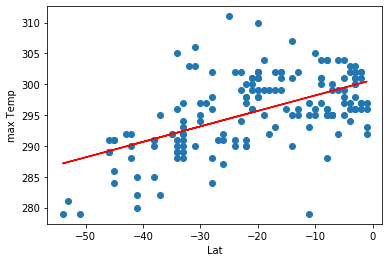

In [110]:
x_values = Southern_df['Lat']
y_values = Southern_df['max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.23
Line equation is y = 0.25x + 61.67


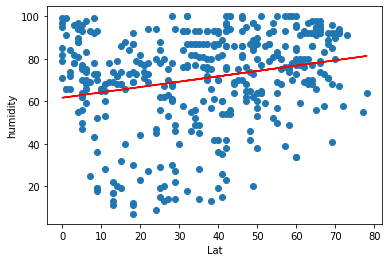

In [112]:
x_values = Northern_df['Lat']
y_values = Northern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('humidity')
plt.show()

The r-squared is: 0.10358336015746494


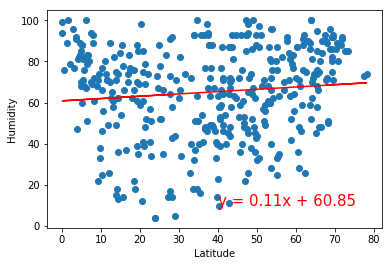

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.26
Line equation is y = 0.33x + 84.77


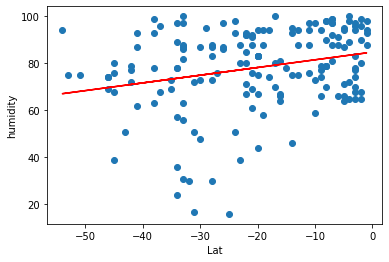

In [113]:
x_values = Southern_df['Lat']
y_values = Southern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('humidity')
plt.show()

The r-squared is: 0.14689473425583055


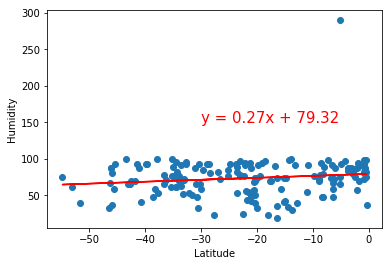

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.24
Line equation is y = 0.43x + 39.9


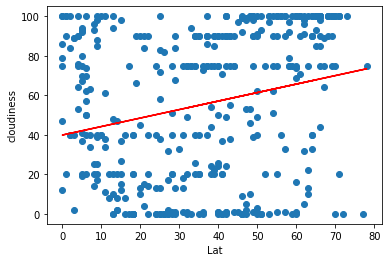

In [114]:
x_values = Northern_df['Lat']
y_values = Northern_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('cloudiness')
plt.show()

The r-squared is: -0.08733547918934018


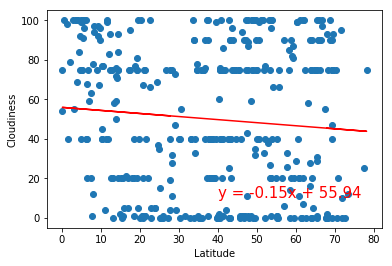

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.25
Line equation is y = 0.69x + 65.64


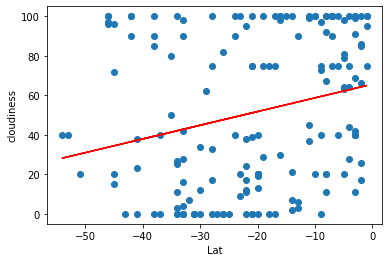

In [115]:
x_values = Southern_df['Lat']
y_values = Southern_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('cloudiness')
plt.show()

The r-squared is: 0.21881426893991618


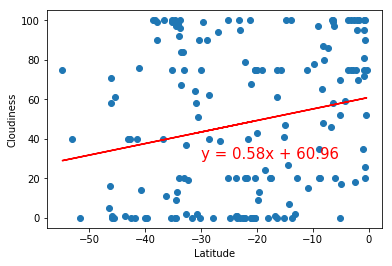

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.27
Line equation is y = 0.04x + 2.28


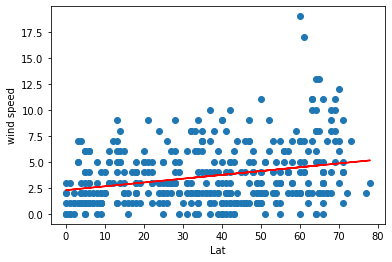

In [116]:
x_values = Northern_df['Lat']
y_values = Northern_df['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('wind speed')
plt.show()

The r-squared is: 0.1071382774388479


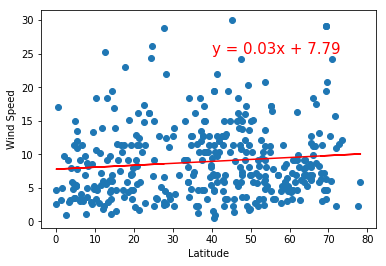

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:-0.37
Line equation is y = -0.07x + 1.19


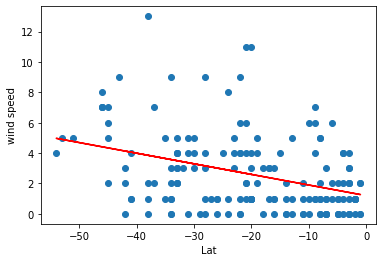

In [111]:
x_values = Southern_df['Lat']
y_values = Southern_df['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is:{round(rvalue,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('wind speed')
plt.show()

The r-squared is: -0.322483077139538


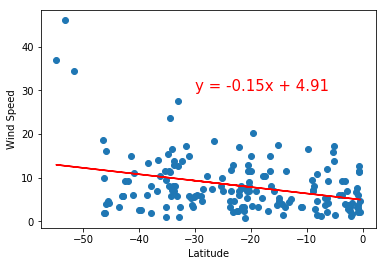